In [1]:
# Setting Dependencies
import tweepy
import json
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
news_channels = ['BBC','CBS','CNN','fox','nytimes']

In [4]:
# Setting Up an Array

tweet_count = 100

# Setting Up Sentiment Analysis for News Channels 
# Selected on Twitter into a DataFrame

news_channel_sa = pd.DataFrame()

for channel in news_channels :
    news_media = []
    positive = []
    neutral = []
    negative = []
    compound = []
    create_date = []
    tweets_ago = []

    public_tweets = api.user_timeline(channel, count = tweet_count)
    
    i = 0
    for tweet in public_tweets:
        tweet_text = tweet["text"]
        
        positive.append(analyzer.polarity_scores(tweet_text)["pos"])
        neutral.append(analyzer.polarity_scores(tweet_text)["neu"])
        negative.append(analyzer.polarity_scores(tweet_text)["neg"])
        compound.append(analyzer.polarity_scores(tweet_text)["compound"])
        create_date.append(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")) 
        news_media.append(tweet['user']['screen_name'])
        tweets_ago.append(i)
        i = i-1
        
    data = pd.DataFrame({"news_media": news_media,
                         "positive": positive,
                         "neutral": neutral,
                         "negative": negative,
                         "compound": compound,
                         "create_date": create_date,
                         "tweets_ago":tweets_ago
                       })
    news_channel_sa = news_channel_sa.append(data)
    
news_channel_sa.set_index('news_media', 'create_date')

news_channel_sa.to_csv("/Users/carolineteti/Downloads/news_channel_sa.csv")

In [5]:
tweets_ago = news_channel_sa.loc[news_channel_sa.news_media == 'BBC']['tweets_ago']
tweet_compound = news_channel_sa.loc[news_channel_sa.news_media == 'BBC']['compound']

print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


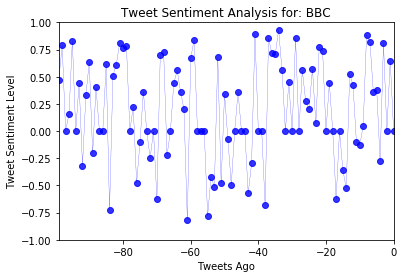

In [25]:
plt.plot(tweets_ago, tweet_compound, marker ="o", 
               linewidth = 0.25, alpha = 0.8, color ="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])

plt.title("Tweet Sentiment Analysis for: %s" % 'BBC')
plt.ylabel("Tweet Sentiment Level")
plt.xlabel("Tweets Ago")

plt.savefig("/Users/carolineteti/Downloads/bbc.png")
plt.show()

In [7]:
tweets_ago = news_channel_sa.loc[news_channel_sa.news_media == 'CBS']['tweets_ago']
tweet_compound = news_channel_sa.loc[news_channel_sa.news_media == 'CBS']['compound']

print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


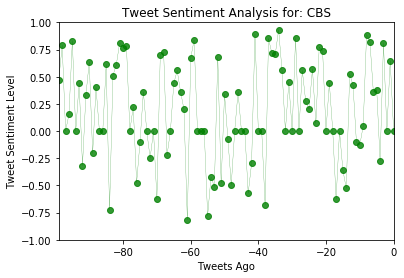

In [27]:
plt.plot(tweets_ago, tweet_compound, marker = "o", 
               linewidth = 0.25, alpha=0.8, color = "g")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])

plt.title("Tweet Sentiment Analysis for: %s" % 'CBS')
plt.ylabel("Tweet Sentiment Level")
plt.xlabel("Tweets Ago")

plt.savefig("/Users/carolineteti/Downloads/cbs.png")
plt.show()

In [9]:
tweets_ago = news_channel_sa.loc[news_channel_sa.news_media == 'CNN']['tweets_ago']
tweet_compound = news_channel_sa.loc[news_channel_sa.news_media == 'CNN']['compound']

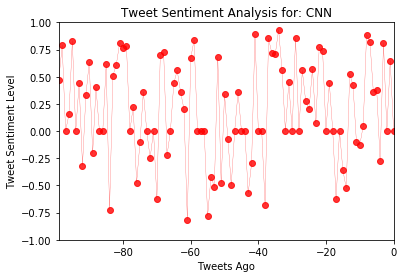

In [28]:
plt.plot(tweets_ago, tweet_compound, marker="o", 
               linewidth=0.25, alpha=0.8, color="r")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])

plt.title("Tweet Sentiment Analysis for: %s" % 'CNN')
plt.ylabel("Tweet Sentiment Level")
plt.xlabel("Tweets Ago")

plt.savefig("/Users/carolineteti/Downloads/cnn.png")
plt.show()

In [11]:
tweets_ago = news_channel_sa.loc[news_channel_sa.news_media == 'fox']['tweets_ago']
tweet_compound = news_channel_sa.loc[news_channel_sa.news_media == 'fox']['compound']

print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


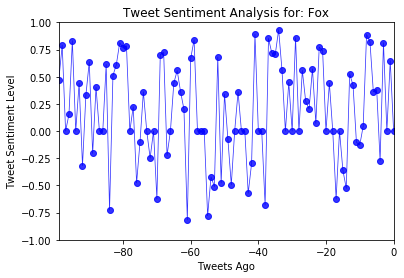

In [29]:
plt.plot(tweets_ago, tweet_compound, marker = "o", 
               linewidth = 0.75, alpha = 0.8, color = "b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])

plt.title("Tweet Sentiment Analysis for: %s" % 'Fox')
plt.ylabel("Tweet Sentiment Level")
plt.xlabel("Tweets Ago")

plt.savefig("/Users/carolineteti/Downloads/fox.png")
plt.show()

In [13]:
tweets_ago = news_channel_sa.loc[news_channel_sa.news_media == 'nytimes']['tweets_ago']
tweet_compound = news_channel_sa.loc[news_channel_sa.news_media == 'nytimes']['compound']
print(tweets_ago.values)

[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99]


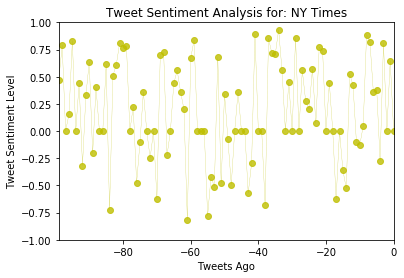

In [30]:
plt.plot(tweets_ago, tweet_compound, marker = "o", 
               linewidth = 0.25, alpha=0.8, color = "y")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])

plt.title("Tweet Sentiment Analysis for: %s" % 'NY Times')
plt.ylabel("Tweet Sentiment Level")
plt.xlabel("Tweets Ago")

plt.savefig("/Users/carolineteti/Downloads/nytimes.png")
plt.show()

In [15]:
total_average = []

for channel in news_channels:
    print(channel)
    tweet_compound = news_channel_sa.loc[news_channel_sa.news_media == channel]['compound']
    total_average.append(np.mean(tweet_compound))
tweets_ago = news_channel_sa.loc[news_channel_sa.news_media == 'fox']['tweets_ago']
tweet_compound = news_channel_sa.loc[news_channel_sa.news_media == 'fox']['compound']

print(total_average)

BBC
CBS
CNN
fox
nytimes
[0.074489, 0.36325900000000005, -0.011130000000000003, 0.19039999999999996, 0.10486100000000001]


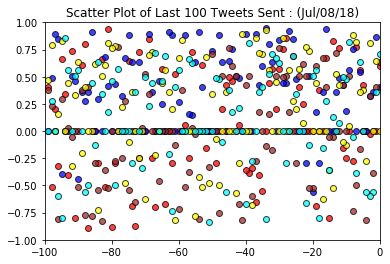

In [51]:
import time
tweets_ago = news_channel_sa.loc[news_channel_sa.news_media == 'BBC']['tweets_ago']
bbc = news_channel_sa.loc[news_channel_sa.news_media == 'BBC']['compound']
plt.scatter(tweets_ago, bbc, marker = "o", facecolors = "red", edgecolors = "black",
            alpha = 0.75)

tweets_ago = news_channel_sa.loc[news_channel_sa.news_media == 'CBS']['tweets_ago']
cbs = news_channel_sa.loc[news_channel_sa.news_media == 'CBS']['compound']
plt.scatter(tweets_ago, cbs, marker = "o", facecolors = "blue", edgecolors="black",
            alpha = 0.75)

tweets_ago = news_channel_sa.loc[news_channel_sa.news_media == 'CNN']['tweets_ago']
cnn = news_channel_sa.loc[news_channel_sa.news_media == 'CNN']['compound']
plt.scatter(tweets_ago, cnn, marker="o", facecolors = "brown", edgecolors = "black",
            alpha = 0.75)

tweets_ago = news_channel_sa.loc[news_channel_sa.news_media == 'fox']['tweets_ago']
fox = news_channel_sa.loc[news_channel_sa.news_media == 'fox']['compound']
plt.scatter(tweets_ago, fox, marker = "o", facecolors = "yellow", edgecolors = "black",
            alpha = 0.75)

tweets_ago = news_channel_sa.loc[news_channel_sa.news_media == 'nytimes']['tweets_ago']
nytimes = news_channel_sa.loc[news_channel_sa.news_media == 'nytimes']['compound']
plt.scatter(tweets_ago, nytimes, marker = "o", facecolors="cyan", edgecolors = "black",
            alpha = 0.75)

x_limit = np.min(tweets_ago)


plt.title("Scatter Plot of Last 100 Tweets Sent : (%s)" % time.strftime("%b/%d/%y"))
plt.xlim(-100, 0)
plt.ylim(-1, 1)

plt.savefig("/Users/carolineteti/Downloads/total_sentiment.png")
plt.show()

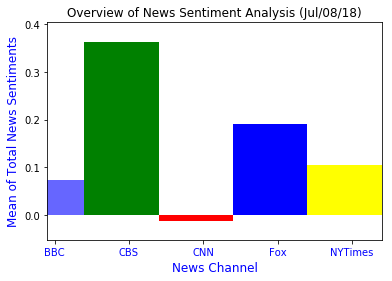

In [52]:
x_axis = [0,1,2,3,4]

plt.bar(0, total_average[0], facecolor = 'blue', alpha = 0.6, align = "center",width = 1.0)
plt.bar(1, total_average[1], facecolor = 'green', alpha = 1.0, align = "center",width = 1.0)
plt.bar(2, total_average[2], facecolor = 'red', alpha = 1.0, align = "center",width = 1.0)
plt.bar(3, total_average[3], facecolor = 'blue', alpha = 1.0, align = "center",width = 1.0)
plt.bar(4, total_average[4], facecolor = 'yellow', alpha = 1.0, align = "center",width = 1.0)

tick_locations = [value+0.1 for value in x_axis]
plt.xticks(tick_locations, ["BBC","CBS","CNN","Fox","NYTimes"], fontsize = 10, color = 'blue')

plt.xlim(0, 4.5)
plt.ylim(min(total_average)-.04, max(total_average)+.04)

plt.title("Overview of News Sentiment Analysis (%s)" % time.strftime("%b/%d/%y")) 
plt.xlabel("News Channel", fontsize = 12, color = 'blue')
plt.ylabel("Mean of Total News Sentiments", fontsize = 12, color = 'blue')

plt.savefig("/Users/carolineteti/Downloads/total.png")
plt.show()